In [1]:
from sklearn import tree
from sklearn.svm import SVC

In [2]:
clf = tree.DecisionTreeClassifier(random_state=42)
#clf = SVC(probability=True, gamma='auto')

In [3]:
X = [[0,0], [1,2], [2,3], [4,5], [0,1]]
y = [0,1,2,2,1]

In [4]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [5]:
clf.predict([[0,2]])

array([1])

In [6]:
clf.predict_proba([[0,0.6]])

array([[0., 1., 0.]])

# Applying to Iris data sets

In [7]:
from sklearn.datasets import load_iris

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df = sns.load_dataset('iris')

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df['species'].unique()
species_to_num = {'setosa': 0,
                  'versicolor': 1, 
                  'virginica': 2}
df['temp'] = df['species'].map(species_to_num)
y = df['temp']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: temp, dtype: int64

In [22]:
#X = df.iloc[:,2:-2]
X = df.iloc[:,0:2]
X.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [23]:
clf = clf.fit(X, y)

# Export graphviz

In [24]:
from sklearn.tree import export_graphviz

In [30]:
export_graphviz(clf,
                out_file = "tree.dot",
                feature_names = df.columns[2:4],
                class_names = df['species'].unique(),
                filled=True,
                rounded=True)

<img src="tree.jpg" width="50" height="60">

# To import Exported file

In [31]:
import graphviz

In [32]:
data_dot = export_graphviz(clf,
                out_file =None,
                feature_names = df.columns[2:4],
                class_names = df['species'].unique(),
                filled=True,
                rounded=True)

In [33]:
graph = graphviz.Source(data_dot)

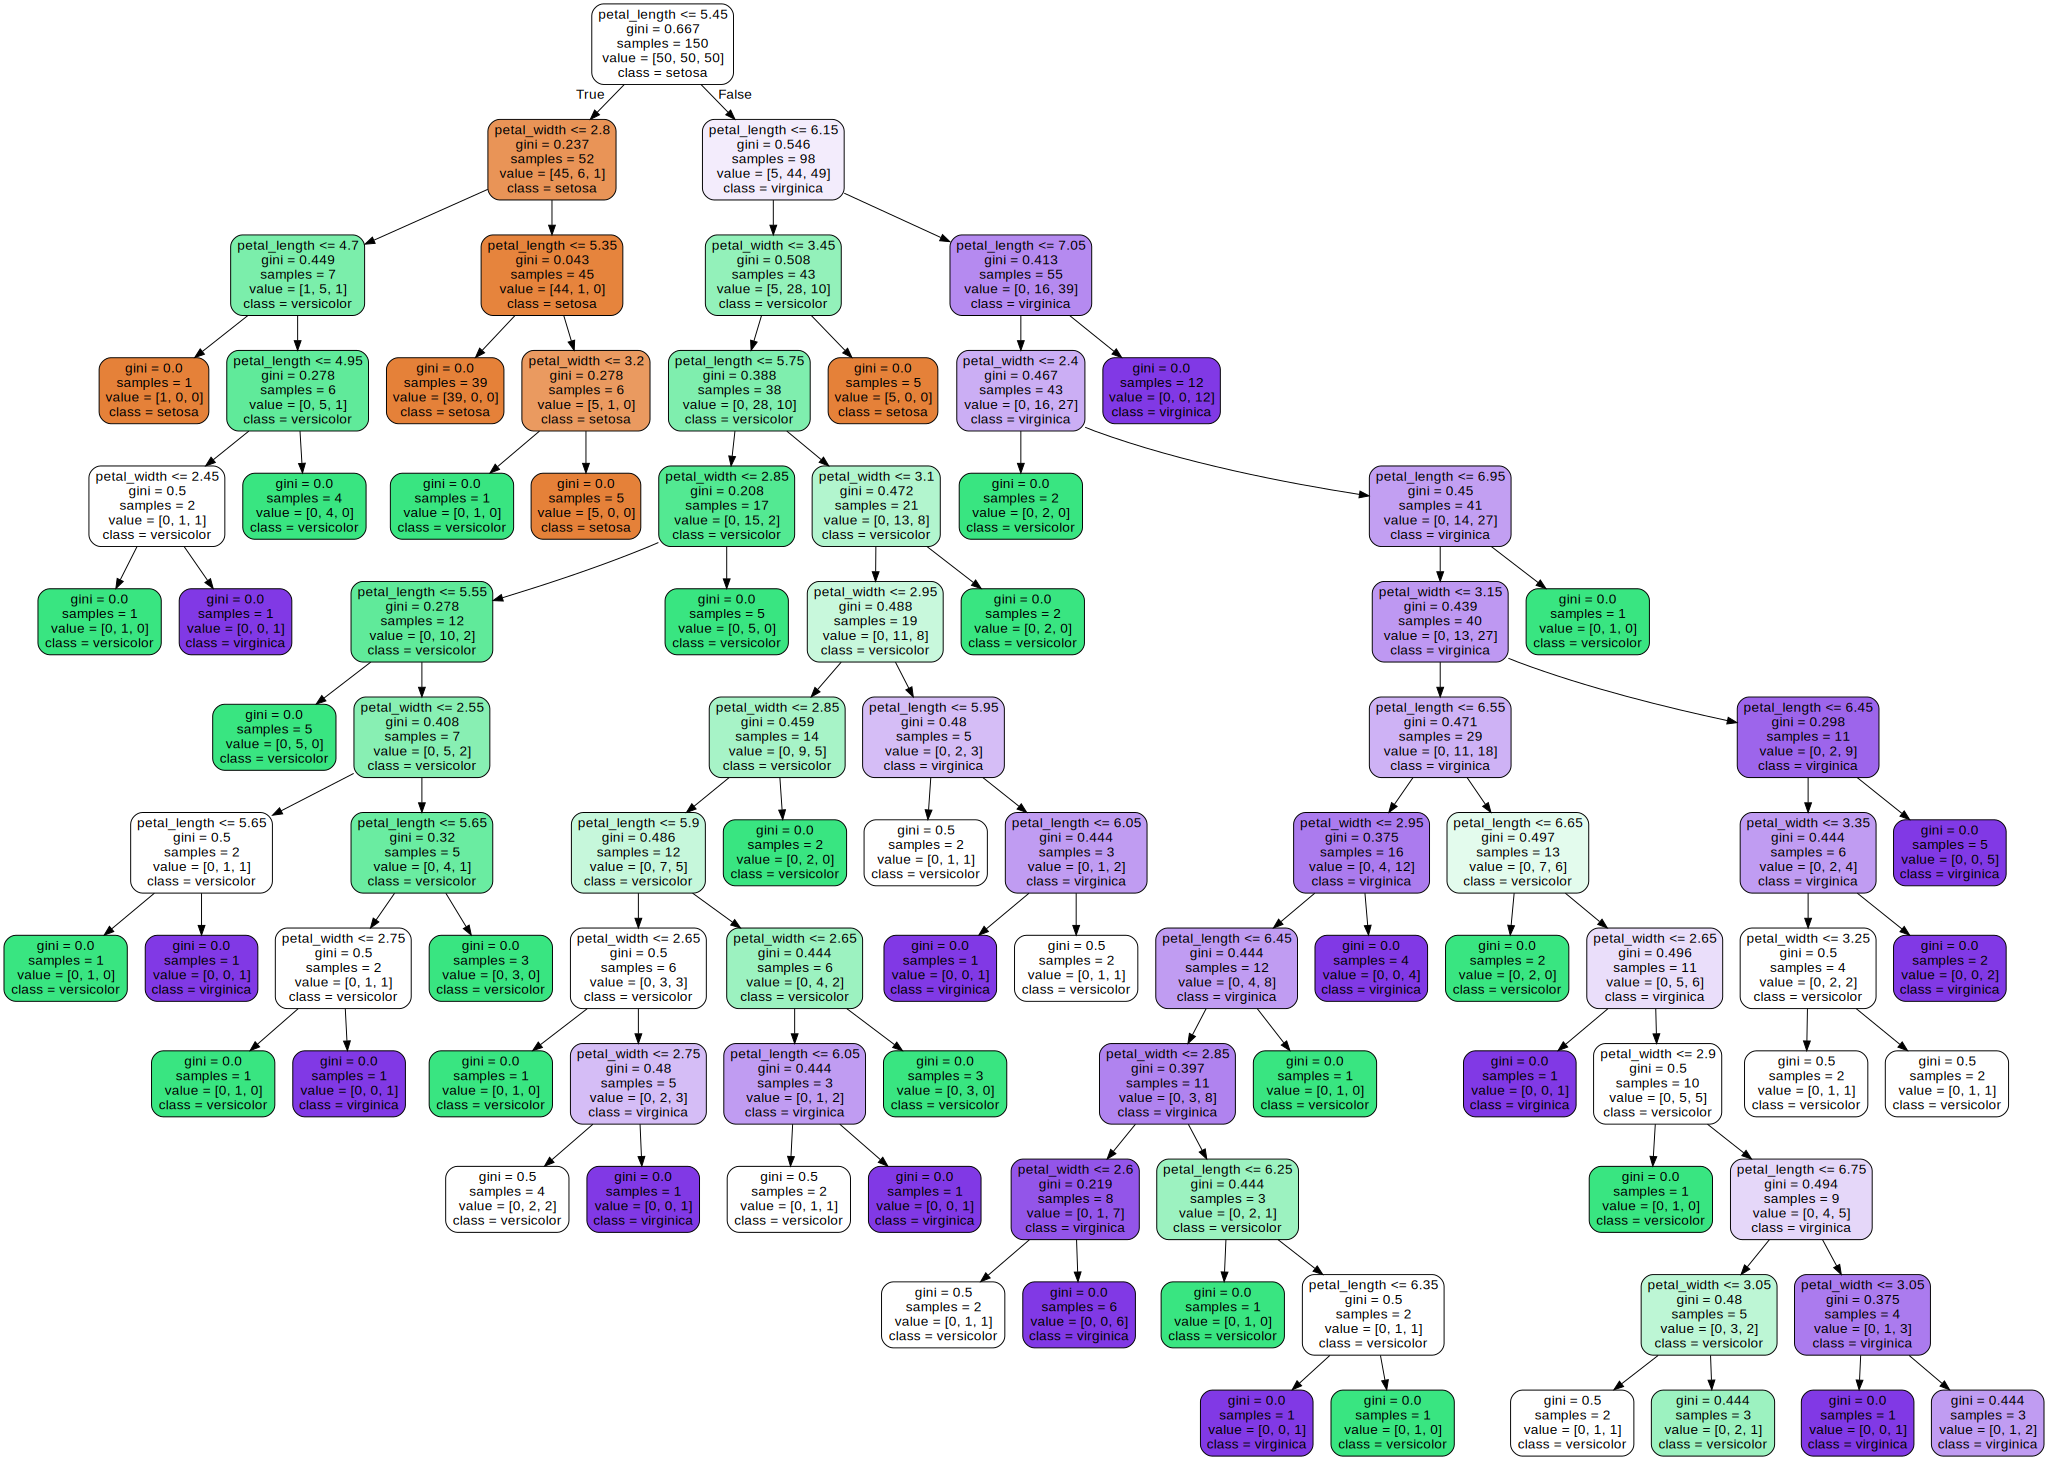

In [34]:
graph

# Visualising the desicion boundary

In [35]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = np.min(Xv), np.max(Xv) + 1
y_min, y_max = np.min(y), np.max(y) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

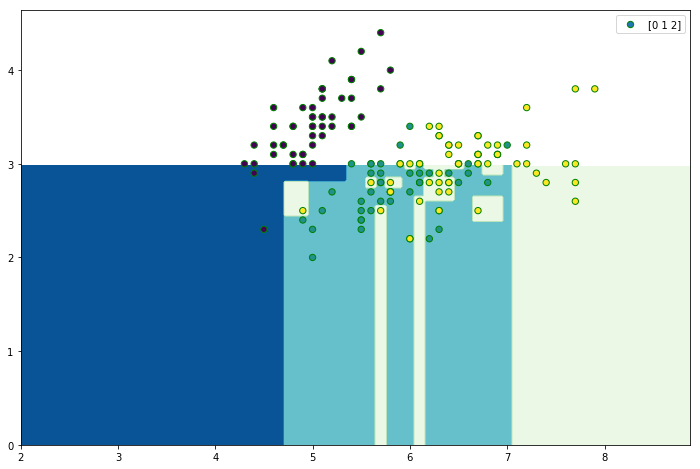

In [47]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, z, cmap = 'GnBu_r')
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = y, edgecolors='g',s = 40, label = y.unique())
plt.legend()
plt.show()

In [49]:
clf.predict([[6.3,2.9]])

array([2], dtype=int64)

In [39]:
X.iloc[5,0:2]

sepal_length    5.4
sepal_width     3.9
Name: 5, dtype: float64

In [42]:
plt.annotate?